<a href="https://colab.research.google.com/github/zugbaa/RUSU_projekt_email_spam_filter/blob/main/Email_spam_filter_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#!pip install -U tensorflow
#!pip install -U tensorflow-text
import pandas as pd
import tensorflow 
import tensorflow_hub as hub
import tensorflow_text as text
from keras.callbacks import EarlyStopping

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Load the dataset
df = pd.read_csv("/content/drive/My Drive/spam.csv")

df = df[['Body', 'Label']]

print(df)

                                                   Body  Label
0     Subject: stock promo mover : cwtd\n * * * urge...      1
1     Subject: are you listed in major search engine...      1
2     Subject: important information thu , 30 jun 20...      1
3     Subject: = ? utf - 8 ? q ? bask your life with...      1
4     Subject: " bidstogo " is places to go , things...      1
...                                                 ...    ...
3995  Subject: revison # 1 - hpl noms . for november...      0
3996  Subject: hpl nom for december 27 , 2000\n ( se...      0
3997  Subject: akamai\n kevin ,\n i have followed up...      0
3998  Subject: re : summary spreadsheet for data ven...      0
3999  Subject: re : congratulations\n congratulation...      0

[4000 rows x 2 columns]


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Body'], df['Label'], stratify=df['Label'])

In [29]:
bert_preprocess = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

In [30]:

#Bert layers
text_input = tensorflow.keras.layers.Input(shape=(), dtype=tensorflow.string, name="text")
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

#Neural network layers
l = tensorflow.keras.layers.Dropout(0.15, name='dropout')(outputs['pooled_output'])
l = tensorflow.keras.layers.Dense(1, activation='sigmoid', name='output')(l)

#Final model
model = tensorflow.keras.Model(inputs=[text_input], outputs=[l])

early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

In [31]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_4 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                

In [32]:

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

In [ ]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

In [34]:
model.evaluate(X_test, y_test)

32/32 [==============================] - 3s 83ms/step - loss: 0.2849 - accuracy: 0.9080


[0.2849156856536865, 0.9079999923706055]

In [35]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

32/32 [==============================] - 3s 78ms/step


In [36]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)

print(y_predicted)

[0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1
 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0
 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0
 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1
 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1
 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0
 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1
 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 1 1 1 0 1 0 0 0 

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[430  70]
 [ 22 478]]


Text(50.722222222222214, 0.5, 'truth')

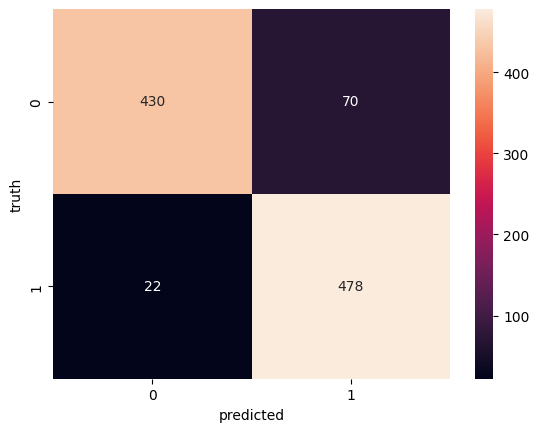

In [38]:
from matplotlib import pyplot as plt
import seaborn as sn

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [39]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       500
           1       0.87      0.96      0.91       500

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000

